<a href="https://colab.research.google.com/github/VanBap/Adverse_Weather/blob/master/Detection_model_usingEfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ngô Hoàng Khánh Văn - 20021599
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import pathlib
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image


from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input


MODEL_NAME_PATH = '/content/drive/MyDrive/KHOA_LUAN/saved_model/EfficientNetB0/EfficientNetB0_checkpoint--loss-0.28-acc-0.91.h5'
MODEL_CHECKPOINT_PATH = '/content/drive/MyDrive/KHOA_LUAN/saved_model/EfficientNetB0/EfficientNetB0_checkpoint-'
TRAINING_HISTORY_PATH = '/content/drive/MyDrive/KHOA_LUAN/saved_model/EfficientNetB0/training_history.txt'


**Kết nối với GGDRIVE**

In [ ]:
# Run this cell if u can't mount ur drive automatically
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. DATA**

In [ ]:
train_data_dir = '/content/drive/MyDrive/KHOA_LUAN/DATASET/DATASET_splitted/train'
valid_data_dir = '/content/drive/MyDrive/KHOA_LUAN/DATASET/DATASET_splitted/val'
test_data_dir = '/content/drive/MyDrive/KHOA_LUAN/DATASET/DATASET_splitted/test'

# 5-fold cross validation
# train_data_dir = '/content/drive/MyDrive/DATASET_5_fold_splitted/train'
# test_data_dir = '/content/drive/MyDrive/DATASET_5_fold_splitted/test'


Hiển thị số lượng ảnh có và nhãn của chúng (tên folder)

In [ ]:
num_images = len(os.listdir(train_data_dir))
print("Number of sub folder:", num_images)
subfolders = ['Sunrise', 'Snowy', 'Shine', 'Sandy', 'Rainy', 'Fog', 'Cloudy']

# Tạo biến để lưu tổng số ảnh
total_images_1 = 0
# Đếm số lượng ảnh trong mỗi thư mục con và tính tổng
for subfolder in subfolders:
    subfolder_path = os.path.join(train_data_dir, subfolder)
    num_images = len(os.listdir(subfolder_path))
    print(f"Number of images in {subfolder}: {num_images}")
    total_images_1 += num_images
# In tổng số ảnh
print("Total number of train images:", total_images_1)

print("============================================")

num_images = len(os.listdir(valid_data_dir))
print("Images in train folder")
print("Number of sub folder:", num_images)
subfolders = ['Sunrise', 'Snowy', 'Shine', 'Sandy', 'Rainy', 'Fog', 'Cloudy']
# Tạo biến để lưu tổng số ảnh
total_images_2 = 0
# Đếm số lượng ảnh trong mỗi thư mục con và tính tổng
for subfolder in subfolders:
    subfolder_path = os.path.join(valid_data_dir, subfolder)
    num_images = len(os.listdir(subfolder_path))
    print(f"Number of images in {subfolder}: {num_images}")
    total_images_2  += num_images
# In tổng số ảnh
print("Total number of valid images:", total_images_2 )

print("============================================")

num_images = len(os.listdir(test_data_dir))
print("Images in train folder")
print("Number of sub folder:", num_images)
subfolders = ['Sunrise', 'Snowy', 'Shine', 'Sandy', 'Rainy', 'Fog', 'Cloudy']
# Tạo biến để lưu tổng số ảnh
total_images_3 = 0
# Đếm số lượng ảnh trong mỗi thư mục con và tính tổng
for subfolder in subfolders:
    subfolder_path = os.path.join(test_data_dir, subfolder)
    num_images = len(os.listdir(subfolder_path))
    print(f"Number of images in {subfolder}: {num_images}")
    total_images_3 += num_images
# In tổng số ảnh
print("Total number of test images:", total_images_3)

print("============================================")

final = total_images_3+total_images_2+total_images_1
print(f"TOTAL IMAGES:{final}")

Number of sub folder: 7
Number of images in Sunrise: 214
Number of images in Snowy: 122
Number of images in Shine: 151
Number of images in Sandy: 193
Number of images in Rainy: 249
Number of images in Fog: 180
Number of images in Cloudy: 180
Total number of train images: 1289
Images in train folder
Number of sub folder: 7
Number of images in Sunrise: 71
Number of images in Snowy: 40
Number of images in Shine: 50
Number of images in Sandy: 64
Number of images in Rainy: 83
Number of images in Fog: 60
Number of images in Cloudy: 60
Total number of valid images: 428
Images in train folder
Number of sub folder: 7
Number of images in Sunrise: 72
Number of images in Snowy: 42
Number of images in Shine: 52
Number of images in Sandy: 66
Number of images in Rainy: 83
Number of images in Fog: 60
Number of images in Cloudy: 60
Total number of test images: 435
TOTAL IMAGES:2152


* **Image processing**

In [ ]:
img_height, img_width = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(preprocessing_function= None,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
# tạo dữ liệu tăng cường: xoay ảnh = 0.2; phóng to = 0.2; lật ảnh ngang; giữ 40% cho validation

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical')
    #subset='training') # set as training data

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical')
    #subset='validation') # set as validation data

test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size = 1,
    class_mode='categorical')
    #subset='validation') # set as testing data

train_generator.class_indices
valid_generator.class_indices
test_generator.class_indices

Found 1289 images belonging to 7 classes.
Found 428 images belonging to 7 classes.
Found 435 images belonging to 7 classes.


{'Cloudy': 0,
 'Fog': 1,
 'Rainy': 2,
 'Sandy': 3,
 'Shine': 4,
 'Snowy': 5,
 'Sunrise': 6}

Truy cập thử thuộc tính của hình ảnh trong test_dir


In [ ]:
# x = test_generator[8][0]
# y = test_generator[8][1]
x, y = test_generator.next()
# input shape + output shape cua model.h5
print(" test folder/ image' shape: ", x.shape)    # image input (matrix)
print(" test folder/ label'shape: ", y.shape)     # label one-hot encoding
print(y)
print("==================================================")

x1, y1 = train_generator.next()
# input shape + output shape cua model.h5
print(" train folder/ image' shape: ", x1.shape)    # image input (matrix)
print(" train folder/ label'shape: ", y1.shape)     # label one-hot encoding
#print(y1)

print("==================================================")

x2, y2 = valid_generator.next()
# input shape + output shape cua model.h5
print(" valid folder/ image' shape: ", x2.shape)    # image input (matrix)
print(" valid folder/ label'shape: ", y2.shape)     # label one-hot encoding
#print(y1)


 test folder/ image' shape:  (1, 224, 224, 3)
 test folder/ label'shape:  (1, 7)
[[0. 0. 0. 1. 0. 0. 0.]]
 train folder/ image' shape:  (32, 224, 224, 3)
 train folder/ label'shape:  (32, 7)
 valid folder/ image' shape:  (32, 224, 224, 3)
 valid folder/ label'shape:  (32, 7)


In [ ]:
train_generator.samples

1289

**2. Train Model**

In [ ]:
import time
from tensorflow.keras.callbacks import Callback
class TimingCallback(Callback):
    def on_train_begin(self, logs={}):
        self.start_time = time.time()

    def on_train_end(self, logs={}):
        self.end_time = time.time()
        training_time = self.end_time - self.start_time
        print("Training time:", training_time, "seconds")

# Sử dụng callback trong quá trình huấn luyện
timing_callback = TimingCallback()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


model = Sequential()
model.add(EfficientNetB0(include_top=False, input_shape = (224, 224, 3), weights='imagenet'))

# Đóng băng các layer của EfficientNetB0
for layer in model.layers:
    layer.trainable = False

model.add(GlobalAveragePooling2D())
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.summary()



# Khởi tạo Adam optimizer
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics= ['accuracy'])

n_train_steps = train_generator.n #train_generator.batch_size
n_valid_steps = valid_generator.n #valid_generator.batch_size

checkpoint = ModelCheckpoint(MODEL_CHECKPOINT_PATH + "-loss-{val_loss:.2f}-acc-{val_accuracy:.2f}.h5", save_best_only=True, verbose=1)

epoch_number = 30

history=model.fit_generator(generator=train_generator,
                  steps_per_epoch=train_generator.samples//batch_size,
                  validation_data=valid_generator,
                  validation_steps=valid_generator.samples//batch_size,
                  epochs=epoch_number,
                  callbacks=[ checkpoint, timing_callback]
)
  #return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 7)                 8967      
                                                                 
Total params: 4058538 (15.48 MB)
Trainable params: 8967 (35.03 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


<ipython-input-16-5ec5f774248b>:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/30
40/40 [==============================] - ETA: 0s - loss: 1.2446 - accuracy: 0.5839
Epoch 1: val_loss improved from inf to 0.80628, saving model to /content/drive/MyDrive/KHOA_LUAN/saved_model/EfficientNetB0/EfficientNetB0_checkpoint--loss-0.81-acc-0.77.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 456s 11s/step - loss: 1.2446 - accuracy: 0.5839 - val_loss: 0.8063 - val_accuracy: 0.7668
Epoch 2/30
40/40 [==============================] - ETA: 0s - loss: 0.6877 - accuracy: 0.7900
Epoch 2: val_loss improved from 0.80628 to 0.56942, saving model to /content/drive/MyDrive/KHOA_LUAN/saved_model/EfficientNetB0/EfficientNetB0_checkpoint--loss-0.57-acc-0.83.h5
40/40 [==============================] - 152s 4s/step - loss: 0.6877 - accuracy: 0.7900 - val_loss: 0.5694 - val_accuracy: 0.8293
Epoch 3/30
40/40 [==============================] - ETA: 0s - loss: 0.5260 - accuracy: 0.8337
Epoch 3: val_loss improved from 0.56942 to 0.49195, saving model to /content/drive/MyDrive/KHOA_LUAN/saved_model/EfficientNetB0/EfficientNetB0_checkpoint--loss-0.49-acc-0.85.h5
40/40 [==============================] - 150s 4s/step - loss: 0.5260 - accuracy: 0.8337 - val_loss: 0.4920 - val_accuracy: 0.8510
Epoch 4/30
40/40 [==============================] - ETA: 0s - loss:

**Save History**

In [ ]:
import pickle
with open('/content/drive/MyDrive/KHOA_LUAN/saved_model/EfficientNetB0/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

VẼ ĐỒ THỊ LOSS VÀ ACCURACY


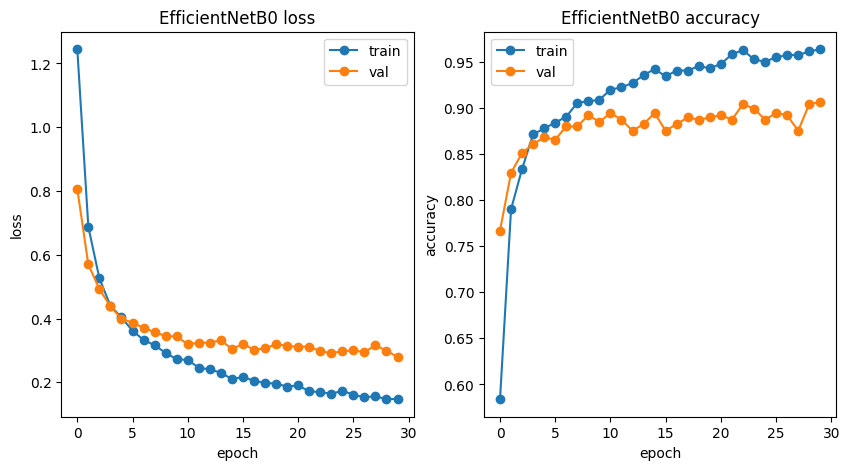

In [ ]:
import matplotlib.pyplot as pyplot
# load history
with open('/content/drive/MyDrive/KHOA_LUAN/saved_model/EfficientNetB0/trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)

# plot loss và accuracy
pyplot.figure(figsize=(10,5))
pyplot.subplot(121)
pyplot.title('EfficientNetB0 loss')
pyplot.plot(history['loss'], label='train', marker='o')
pyplot.plot(history['val_loss'], label='val', marker='o')
pyplot.xlabel('epoch')
pyplot.ylabel('loss')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(122)

pyplot.title('EfficientNetB0 accuracy')
pyplot.plot(history['accuracy'], label='train', marker='o')
pyplot.plot(history['val_accuracy'], label='val', marker='o')
pyplot.xlabel('epoch')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()


**Save model**

In [ ]:
model.save(MODEL_NAME_PATH)


**Load model**

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/KHOA_LUAN/saved_model/EfficientNetB0/EfficientNetB0_checkpoint--loss-0.28-acc-0.91.h5')


Ghi kết quả train vào file training.txt

In [ ]:
# Kiểm tra xem file đã tồn tại chưa
import os

file_exists = os.path.isfile(TRAINING_HISTORY_PATH)

# Lưu accuracy và loss vào file (ghi đè hoặc thêm mới)
with open(TRAINING_HISTORY_PATH, 'a' if file_exists else 'w') as f:
    if not file_exists:
        f.write('epoch,   loss, accuracy, val_loss, val_accuracy\n')
    for epoch in range(epoch_number):  # Vì đã thiết lập epochs=10 ở trên
        f.write(f"{epoch + 1}    ,{history['loss'][epoch]:.6f},{history['accuracy'][epoch]:.6f},{history['val_loss'][epoch]:.6f},{history['val_accuracy'][epoch]:.6f}\n")


**3. Đánh giá Test**

In [ ]:
 # model = tf.keras.models.load_model('/content/drive/MyDrive/KHOA_LUAN/saved_model/ResNet50_Weather_epoch20.h5')
 # Test và in kết quả
test_loss, test_acc = model.evaluate(test_generator, verbose = 2)
print('\nTest accuracy', test_acc)

435/435 - 156s - loss: 0.3244 - accuracy: 0.8851 - 156s/epoch - 358ms/step

Test accuracy 0.8850574493408203


Ghi vào file training.txt

In [ ]:
file_exists = os.path.isfile(TRAINING_HISTORY_PATH)

# Mở file để ghi (nếu file chưa tồn tại, sẽ được tạo mới)
with open(TRAINING_HISTORY_PATH, 'a') as f:
    # Ghi accuracy và loss vào file
    f.write(f'Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}\n')

**Hiển thị thử kết quả dự đoán**

1/1 [==============================] - 2s 2s/step
[2.3745095e-07 4.6116537e-03 3.8898510e-05 9.9533480e-01 5.9917689e-08
 1.2422648e-05 1.7703683e-06]
Sandy 3


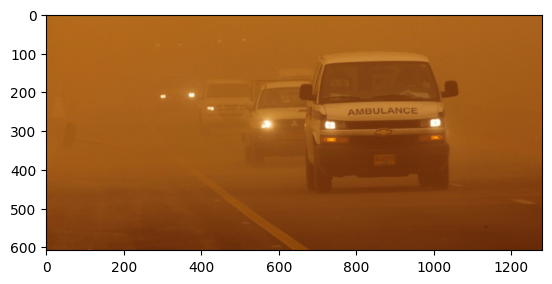

In [ ]:
from PIL import Image
image_url = "/content/drive/MyDrive/KHOA_LUAN/DATASET/DATASET_splitted/test/Sandy/sand_storm-211.jpg"

class_indices = list(test_generator.class_indices.values())
class_names = list(test_generator.class_indices.keys())

img = Image.open(image_url).resize((224,224))
img = np.array(img)

pred = model.predict(img[None, :, :])[0]
print(pred)
index = np.argmax(pred)

print(class_names[index],class_indices[index])

plt.imshow(Image.open(image_url))
plt.show()

**Vẽ Confusion matrix dự đoán các ảnh trong folder test**

1/1 [==============================] - 0s 76ms/step


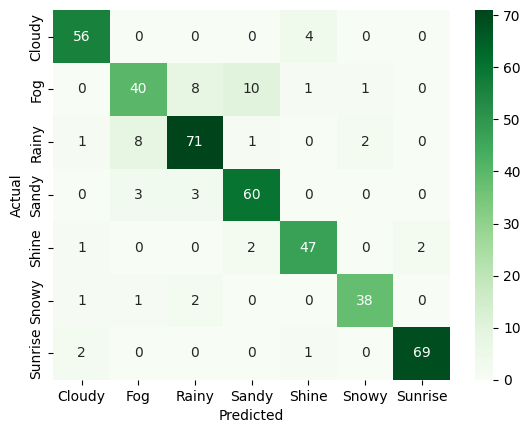

test accuracy : 87.58620689655172


In [ ]:
import pandas as pd
import seaborn as sn
import tensorflow as tf


filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()

# lấy input, output mong muốn -> nhét kết quả dự đoán vào y_prob, output mong muốn vào y_actual
for _ in range(nb_samples):
  X_test, Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class =  [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, cmap='Greens', annot=True, fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

**TÍNH TOÁN PRECISION, RECALL VÀ F1-SCORE**


In [ ]:
y_predicted_class = [i.argmax() for i in y_prob]
y_actual_class =  [i.argmax() for i in y_act]

#print(temp_predicted_class)
#print(temp_actual_class)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

# Calculate: Precision / Recall / F1
target_names = test_generator.class_indices.keys()
print(classification_report(y_actual_class,y_predicted_class, target_names=target_names))

              precision    recall  f1-score   support

      Cloudy       0.92      0.93      0.93        60
         Fog       0.77      0.67      0.71        60
       Rainy       0.85      0.86      0.85        83
       Sandy       0.82      0.91      0.86        66
       Shine       0.89      0.90      0.90        52
       Snowy       0.93      0.90      0.92        42
     Sunrise       0.97      0.96      0.97        72

    accuracy                           0.88       435
   macro avg       0.88      0.88      0.88       435
weighted avg       0.88      0.88      0.87       435

